# Movie Recomendation System

**AIM**: Implementation of association rules on movies dataset that is taken from a movie recomendation website named movielens.

**DESCRIPTION:**

Association rule mining finds interesting associations and relationships among large sets of data items.

This rule displays the number of times an itemset appears in a transaction.

A market-based analysis serves as a common illustration.

We can discover rules that anticipate the occurrence of an item based on the occurrences of other things in the transaction given a set of transactions.


**We import numpy, pandas, matplotlib, Apriori algorithm**

NumPy is a Python library used for working with arrays

Pandas has been one of the most commonly used tools for Data Science and Machine learning, which is used for data cleaning and analysis.

Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.

Apriori algorithm is a machine learning model used in Association Rule Learning to identify frequent itemsets from a dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import requests, zipfile, io
zipfile.ZipFile(io.BytesIO(requests.get('http://files.grouplens.org/datasets/movielens/ml-latest-small.zip').content)).extractall()

ls -a will list all files including hidden files (files with names beginning with a dot).

In [3]:
ls -a ml-latest-small

./  ../  links.csv  movies.csv  ratings.csv  README.txt  tags.csv


In [4]:
data_movies = pd.read_csv('ml-latest-small/movies.csv')
data_tages = pd.read_csv('ml-latest-small/tags.csv')
data_ratings = pd.read_csv('ml-latest-small/ratings.csv')

In [5]:
data_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
data_movies.movieId.value_counts(),print('Number of duplicated unique ids are: ',data_movies.movieId.duplicated().sum())

Number of duplicated unique ids are:  0


(movieId
 1         1
 53322     1
 53129     1
 53138     1
 53140     1
          ..
 4390      1
 4392      1
 4393      1
 4394      1
 193609    1
 Name: count, Length: 9742, dtype: int64,
 None)

In [7]:
data_tages

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


In [8]:
data_tages.movieId.value_counts()

,count
movieId,
296,181
2959,54
924,41
293,35
7361,34
...,...
3307,1
3310,1
3317,1


**Movies Rating Data**
Movies rating data contain more that 9k movies ids which can be usefull to be merged with the movies title dataset.

In [9]:
data_ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [10]:
data_ratings.movieId.value_counts()

,count
movieId,
356,329
318,317
296,307
593,279
2571,278
...,...
86279,1
86922,1
5962,1


**MERGING DATASETS**

In this case inner join is selected since we need the data only when both movieId labels are existed on both datasets.

Inner joins combine records from two tables whenever there are matching values in a field common to both tables.

In [11]:
merge = data_movies.merge(data_tages,on = 'movieId',how = 'inner')

In [12]:
merge

,movieId,title,genres,userId,tag,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336,pixar,1139045764
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,474,pixar,1137206825
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,567,fun,1525286013
3,2,Jumanji (1995),Adventure|Children|Fantasy,62,fantasy,1528843929
4,2,Jumanji (1995),Adventure|Children|Fantasy,62,magic board game,1528843932
...,...,...,...,...,...,...
3678,187595,Solo: A Star Wars Story (2018),Action|Adventure|Children|Sci-Fi,62,star wars,1528934552
3679,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,anime,1537098582
3680,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,comedy,1537098587
3681,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,gintama,1537098603


Dropping unneeded columns.

inplace true is used to save the changes made.

In [13]:
merge.drop(columns=['tag','timestamp','genres'],inplace=True)


In [14]:
merge

,movieId,title,userId
0,1,Toy Story (1995),336
1,1,Toy Story (1995),474
2,1,Toy Story (1995),567
3,2,Jumanji (1995),62
4,2,Jumanji (1995),62
...,...,...,...
3678,187595,Solo: A Star Wars Story (2018),62
3679,193565,Gintama: The Movie (2010),184
3680,193565,Gintama: The Movie (2010),184
3681,193565,Gintama: The Movie (2010),184


Since we are going to merge. lets observe how many users we have.

In [15]:
len(merge.userId.unique())

58

Here we preprocess the dataset to create a transactional list where every row represent a user and his selected movies, which is similar to table. 1.

In [16]:
merge_list = merge.groupby(by = ["userId"])["title"].apply(list).to_frame().reset_index()
merge_list.head()

,userId,title
0,2,"[Step Brothers (2008), Step Brothers (2008), S..."
1,7,"[Departed, The (2006)]"
2,18,"[Carlito's Way (1993), Carlito's Way (1993), C..."
3,21,"[My Best Friend's Wedding (1997), My Best Frie..."
4,49,"[Interstellar (2014), Interstellar (2014), Int..."


sample of the list

In [17]:
merge_list = merge_list["title"].tolist()
merge_list[0:3]

[['Step Brothers (2008)',
  'Step Brothers (2008)',
  'Step Brothers (2008)',
  'Warrior (2011)',
  'Warrior (2011)',
  'Warrior (2011)',
  'Wolf of Wall Street, The (2013)',
  'Wolf of Wall Street, The (2013)',
  'Wolf of Wall Street, The (2013)'],
 ['Departed, The (2006)'],
 ["Carlito's Way (1993)",
  "Carlito's Way (1993)",
  "Carlito's Way (1993)",
  'Godfather: Part II, The (1974)',
  'Godfather: Part II, The (1974)',
  'Pianist, The (2002)',
  'Pianist, The (2002)',
  'Lucky Number Slevin (2006)',
  'Fracture (2007)',
  'Fracture (2007)',
  'Fracture (2007)',
  'Upside Down: The Creation Records Story (2010)',
  'Upside Down: The Creation Records Story (2010)',
  'Upside Down: The Creation Records Story (2010)',
  'Just Eat It: A Food Waste Story (2014)',
  'Just Eat It: A Food Waste Story (2014)']]

To validate the created list per user Id we can see it is the same as the code below.

In [18]:
len(merge.userId.unique())

58

In [19]:
len(merge_list)

58

**DATA TRANSFORMATION**

Here data is transfered as a binary input to be accepted by the algorithm, serveral methods are avalible in several packages such as:



**Mlxtend (machine learning extensions)**: It is a Python library of useful tools for the day-to-day data science tasks.
Here from mlxtend we import Apriori algorithm and Transaction Encoder.

**Transaction Encoder**: To apply Apriori machine learning algorithm, first we need to make some changes on the dataset. Using Transactionencoder we can transform this dataset into a logical data frame. Each column represents an item and each row represent a record or a transaction for one purchase.



Using the fit method, the TransactionEncoder learns the unique labels in the dataset, and via the transform method, it transforms the input dataset (a Python list of lists) into a one-hot encoded NumPy boolean array.
A one hot encoding is a representation of categorical variables as binary vectors.

The scaling is used for making data points generalized so that the distance between them will be lower. In data preprocessing, it is also known as data normalization and is generally performed during the data transformation step.

In pandas a DataFrame is: Two-dimensional, size-mutable, potentially heterogeneous tabular data.

In [20]:
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(merge_list).transform(merge_list)
df = pd.DataFrame(te_ary, columns=te.columns_)

In [21]:
df.head()

,(500) Days of Summer (2009),...And Justice for All (1979),10 Cloverfield Lane (2016),10 Things I Hate About You (1999),101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),"11'09""01 - September 11 (2002)",12 Angry Men (1957),127 Hours (2010),13 Going on 30 (2004),...,Young Frankenstein (1974),Z (1969),Zack and Miri Make a Porno (2008),Zelary (2003),Zelig (1983),Zero Dark Thirty (2012),Zombieland (2009),Zoolander (2001),Zulu (1964),eXistenZ (1999)
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [22]:
df.shape

(58, 1572)

**GENERATING FREQUENT ITEMSETS**

This section implement the use of the itemsets generation according to the selected parameters min_support=0.01,max_len=2 as a threshold to paneltize the algorithm of using a huge memory size of the machine (1% support value, and maxixmum length of two items in each row is selected) as well.

# **APRIORI**

 **Apriori Algorithm** is used for mining frequent itemsets and devising association rules from a transactional database.

The parameters **“support”** and **“confidence”** are used. Support refers to items’ frequency of occurrence; confidence is a conditional probability.


In [23]:
from mlxtend.frequent_patterns import apriori
%time
apriori_frequent_itemsets = apriori(df, min_support=0.01,use_colnames=True,max_len=2)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 13.1 µs


In [24]:
# %pip install mlxtend --upgrade

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ASSOCIATION RULES

mlxtend module compute additional measures such as:

**Leverage**(range: [-1, 1]) computes the difference between the observed frequency of A and C appearing together and the frequency that would be expected if A and C were independent. An leverage value of 0 indicates independence.


A high **conviction** value (range: [0, inf]) means that the consequent is highly depending on the antecedent. For instance, in the case of a perfect confidence score, the denominator becomes 0 (due to 1 - 1) for which the conviction score is defined as 'inf'. Similar to lift, if items are independent, the conviction is 1.

Here we are selecting the measure 'Lift' as a score evaluation method

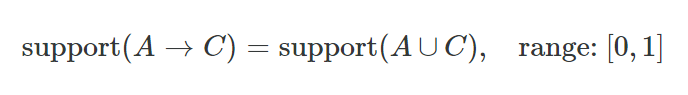

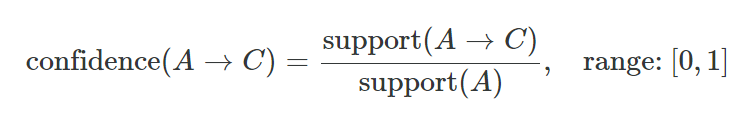

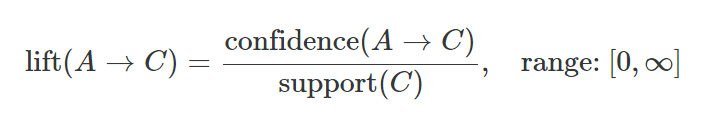

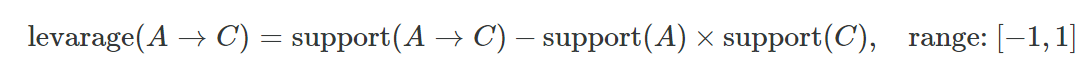

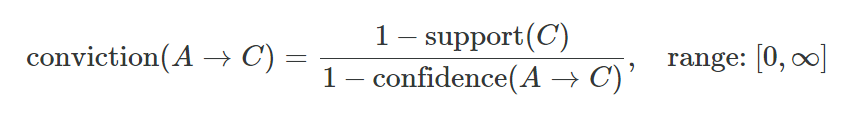



In [25]:
%%time
from mlxtend.frequent_patterns import association_rules
rules = association_rules(apriori_frequent_itemsets ,metric="lift",min_threshold=0.01)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CPU times: user 15.1 s, sys: 867 ms, total: 16 s
Wall time: 16 s


In [26]:
rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,((500) Days of Summer (2009)),(Akira (1988)),0.017241,0.017241,0.017241,1.0,58.0,0.016944,inf,1.000000
1,(Akira (1988)),((500) Days of Summer (2009)),0.017241,0.017241,0.017241,1.0,58.0,0.016944,inf,1.000000
2,((500) Days of Summer (2009)),(American Pie (1999)),0.017241,0.017241,0.017241,1.0,58.0,0.016944,inf,1.000000
3,(American Pie (1999)),((500) Days of Summer (2009)),0.017241,0.017241,0.017241,1.0,58.0,0.016944,inf,1.000000
4,((500) Days of Summer (2009)),(Avatar (2009)),0.017241,0.034483,0.017241,1.0,29.0,0.016647,inf,0.982456
...,...,...,...,...,...,...,...,...,...,...
1549967,(Zulu (1964)),(Zelig (1983)),0.017241,0.017241,0.017241,1.0,58.0,0.016944,inf,1.000000
1549968,(Zelig (1983)),(eXistenZ (1999)),0.017241,0.017241,0.017241,1.0,58.0,0.016944,inf,1.000000
1549969,(eXistenZ (1999)),(Zelig (1983)),0.017241,0.017241,0.017241,1.0,58.0,0.016944,inf,1.000000
1549970,(Zulu (1964)),(eXistenZ (1999)),0.017241,0.017241,0.017241,1.0,58.0,0.016944,inf,1.000000


In [27]:
rules[rules["antecedents"].apply(lambda x: "Inception (2010)" in str(x))].sort_values(ascending=False,by='lift')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
44,(Inception (2010)),((500) Days of Summer (2009)),0.068966,0.017241,0.017241,0.25,14.500000,0.016052,1.310345,1.000000
1027898,(Inception (2010)),(In the Mood For Love (Fa yeung nin wa) (2000)),0.068966,0.017241,0.017241,0.25,14.500000,0.016052,1.310345,1.000000
1029542,(Inception (2010)),(Meet the Fockers (2004)),0.068966,0.017241,0.017241,0.25,14.500000,0.016052,1.310345,1.000000
1029544,(Inception (2010)),(Meet the Parents (2000)),0.068966,0.017241,0.017241,0.25,14.500000,0.016052,1.310345,1.000000
1029549,(Inception (2010)),(Men in Black II (a.k.a. MIIB) (a.k.a. MIB 2) ...,0.068966,0.017241,0.017241,0.25,14.500000,0.016052,1.310345,1.000000
...,...,...,...,...,...,...,...,...,...,...
1029765,(Inception (2010)),(Whiplash (2014)),0.068966,0.051724,0.017241,0.25,4.833333,0.013674,1.264368,0.851852
1029605,(Inception (2010)),(Pulp Fiction (1994)),0.068966,0.068966,0.017241,0.25,3.625000,0.012485,1.241379,0.777778
749776,(Inception (2010)),(Fight Club (1999)),0.068966,0.068966,0.017241,0.25,3.625000,0.012485,1.241379,0.777778
118790,(Inception (2010)),(Anchorman: The Legend of Ron Burgundy (2004)),0.068966,0.068966,0.017241,0.25,3.625000,0.012485,1.241379,0.777778


A less messy way to group the top 10 related movies to the selected one.

We can see here the selected movie inception has top values of lift on related movie due to the same director in them (Dunkirk)

In [28]:
rules[rules["antecedents"].apply(lambda x: "Inception (2010)" in str(x))].groupby(
    ['antecedents', 'consequents'])[['lift']].max().sort_values(ascending=False,by='lift').head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


lift
antecedents        consequents                                  
(Inception (2010)) ((500) Days of Summer (2009))            14.5
                   (Come and See (Idi i smotri) (1985))     14.5
                   (Dallas Buyers Club (2013))              14.5
                   (Devil's Rejects, The (2005))            14.5
                   (District 9 (2009))                      14.5
                   (Doctor Strange (2016))                  14.5
                   (Don't Breathe (2016))                   14.5
                   (Dr. Horrible's Sing-Along Blog (2008))  14.5
                   (Black Swan (2010))                      14.5
                   (Big Daddy (1999))                       14.5

An increasing value of lift is relatively associated with the increase of other measures such as confidence, lets observe top 10 movies that are relativley confidenent to be watched with the selected movie 'Inception'.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


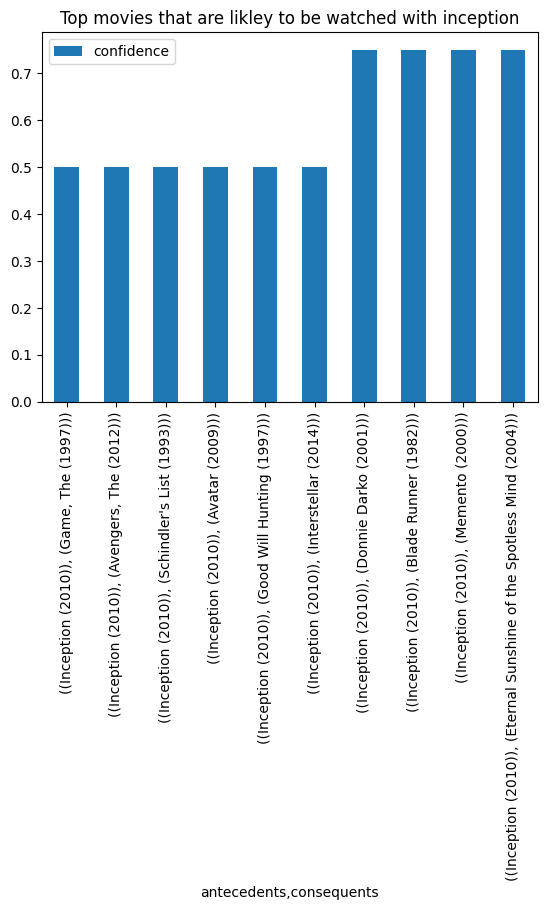

In [29]:
rules[rules["antecedents"].apply(lambda x: "Inception (2010)" in str(x))].groupby(
    ['antecedents', 'consequents'])[['confidence']].max().sort_values(ascending=False,
                                                                      by='confidence').head(10).plot(kind='bar').invert_xaxis()
plt.title('Top movies that are likley to be watched with inception');